# Importation des librairies nécessaires

In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

d:\DOCUMENTS\FORMATION_DATA_AFRIQUE_HUB\plant_disease_classification\.plant-env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# Importation des données

In [8]:
# Les chemins d'accès des fichiers de données
DATA_DIR = "../data/raw/New Plant Diseases Dataset(Augmented)"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VALID_DIR = os.path.join(DATA_DIR, "valid")

# Liste des classes
classes = os.listdir(TRAIN_DIR)
print("Nombre de classes :", len(classes))
print(classes[:10])


Nombre de classes : 38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy']


# Affichage de quelques images

Text(0.5, 1.0, 'Apple___Apple_scab')

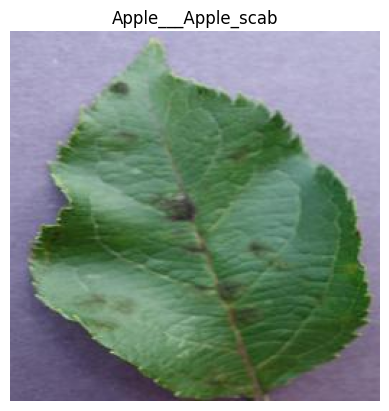

In [9]:
class_name = classes[0]
img_path = os.path.join(TRAIN_DIR, class_name, os.listdir(os.path.join(TRAIN_DIR, class_name))[0])

img = load_img(img_path)
plt.imshow(img)
plt.axis("off")
plt.title(class_name)

# Prétraitement + data augmentation

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

valid_gen = valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


# Modèle (Transfer Learning ) : On utilise MobileNetV2

In [11]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(train_gen.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Compilation et entrainement

In [14]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=2,
    steps_per_epoch=200,
    validation_steps = 50
)


Epoch 1/2
200/200 ━━━━━━━━━━━━━━━━━━━━ 1086s 5s/step - accuracy: 0.8202 - loss: 0.6064 - val_accuracy: 0.8406 - val_loss: 0.5010
Epoch 2/2
200/200 ━━━━━━━━━━━━━━━━━━━━ 1007s 5s/step - accuracy: 0.8747 - loss: 0.4107 - val_accuracy: 0.8813 - val_loss: 0.3683


# Sauvegarde du modèle

In [15]:
model.save("model.h5")

In [16]:
print(classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',